# Data Dictionary:

    -CUST_ID: Credit card holder ID
	-BALANCE: Monthly average balance (based on daily balance averages)
	-BALANCE_FREQUENCY: Ratio of last 12 months with balance
	-PURCHASES: Total purchase amount spent during last 12 months
	-ONEOFF_PURCHASES: Total amount of one-off purchases
	-INSTALLMENTS_PURCHASES: Total amount of installment purchases
	-CASH_ADVANCE: Total cash-advance amount
	-PURCHASES_ FREQUENCY: Frequency of purchases (Percent of months with at least one purchase)
	-ONEOFF_PURCHASES_FREQUENCY: Frequency of one-off-purchases PURCHASES_INSTALLMENTS_FREQUENCY: Frequency of installment      purchases
	-CASH_ADVANCE_ FREQUENCY: Cash-Advance frequency
	-AVERAGE_PURCHASE_TRX: Average amount per purchase transaction
	-CASH_ADVANCE_TRX: Average amount per cash-advance transaction
	-PURCHASES_TRX: Average amount per purchase transaction
	-CREDIT_LIMIT: Credit limit
	-PAYMENTS: Total payments (due amount paid by the customer to decrease their statement balance) in the period
	-MINIMUM_PAYMENTS: Total minimum payments due in the period.
	-PRC_FULL_PAYMEN: Percentage of months with full payment of the due statement balance
	-TENURE: Number of months as a customer


# Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

# Reading CSV file:

In [2]:
df=pd.read_csv(r"C:\Users\7mala\Downloads\Project\Credit-Card-Customer-Segmentation-main\Credit-Card-Customer-Segmentation-main\CS data.csv")

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.shape

(8950, 18)

In [5]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
#Here all the features are being assigned with the correct dtypes. So no need of dtype converion.

In [8]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


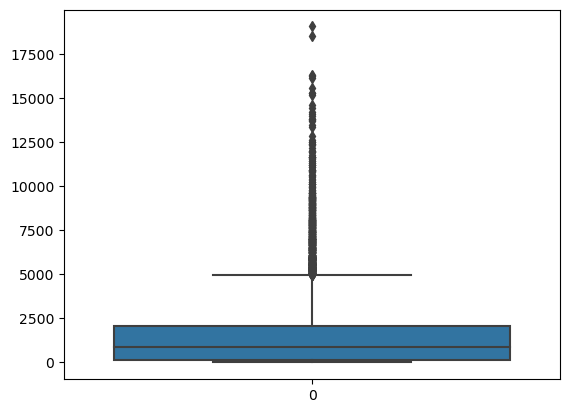

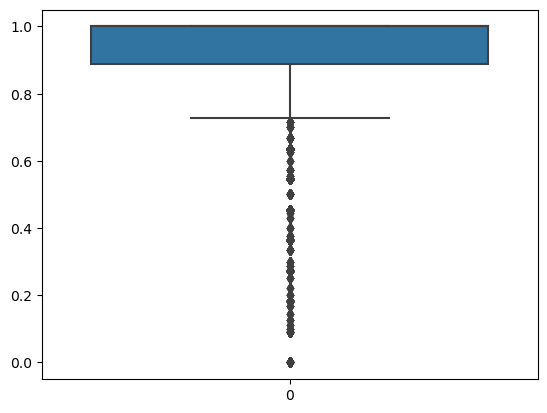

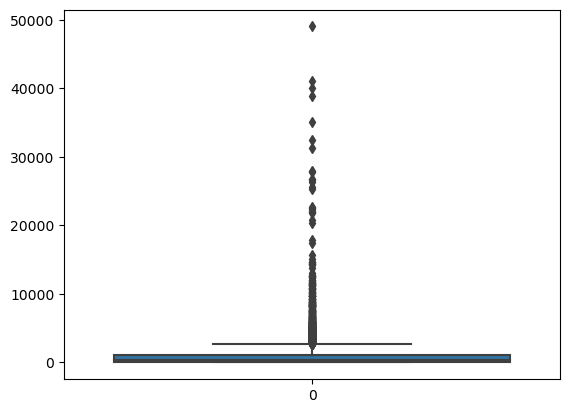

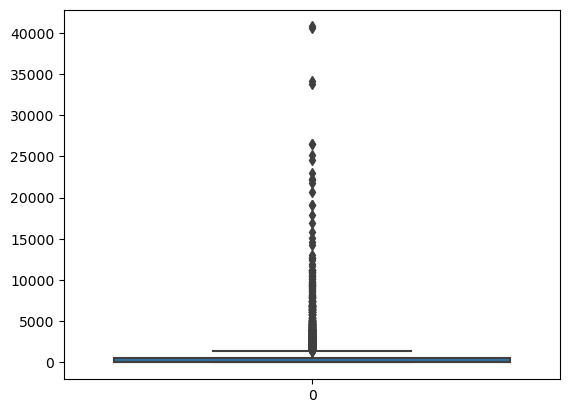

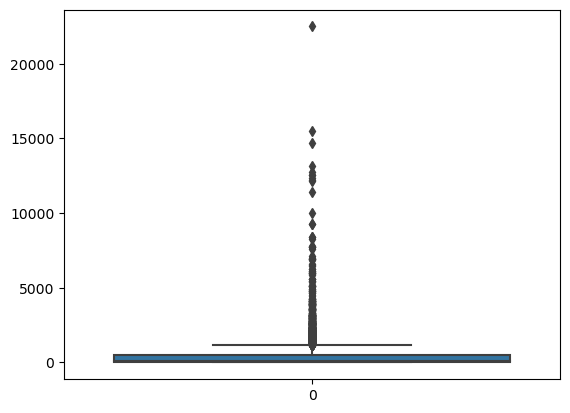

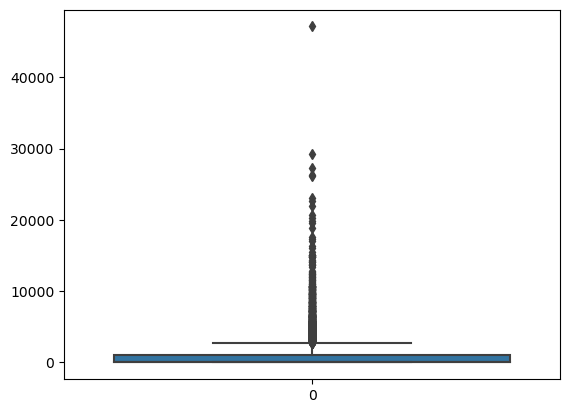

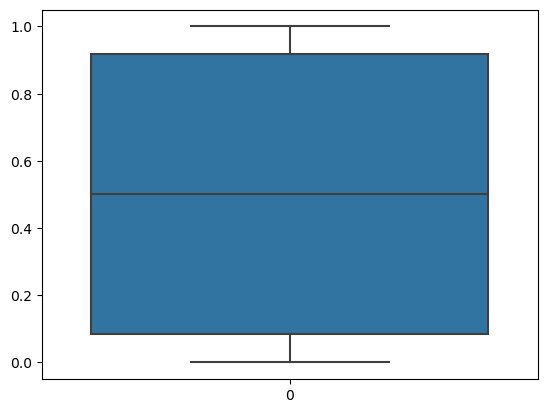

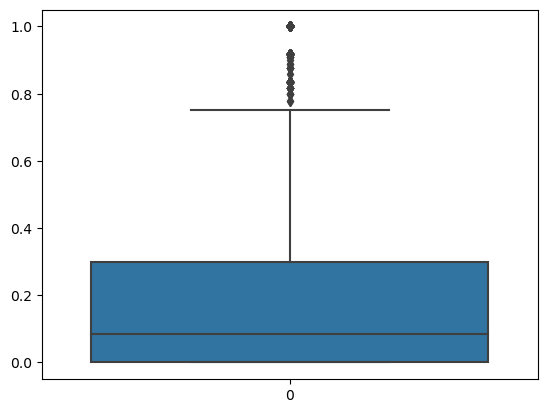

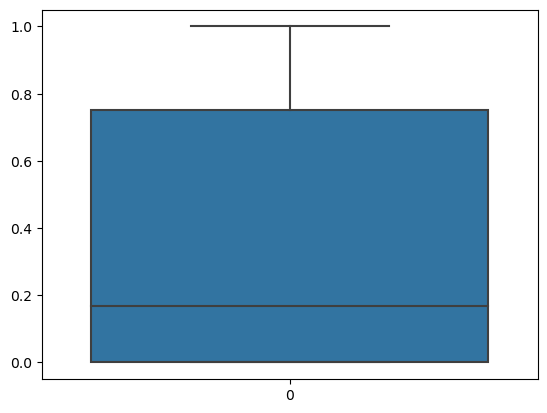

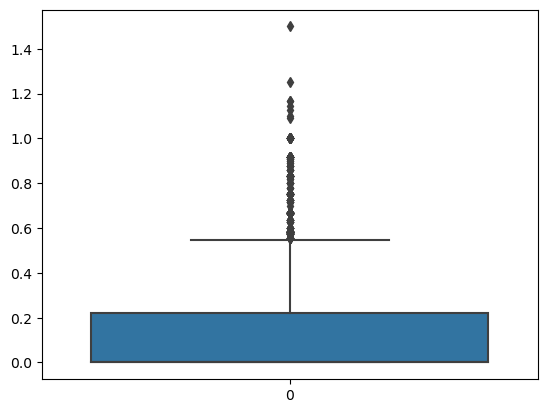

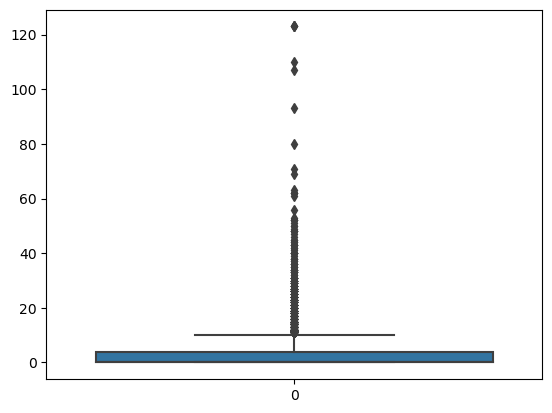

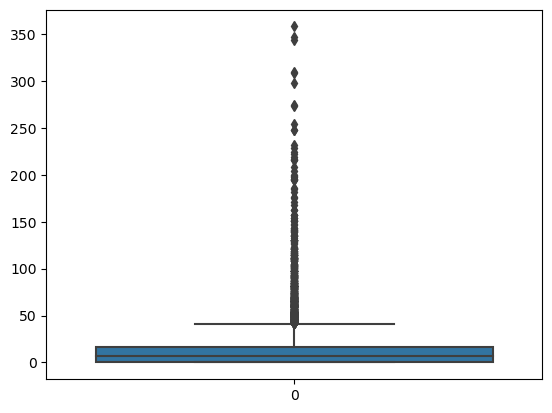

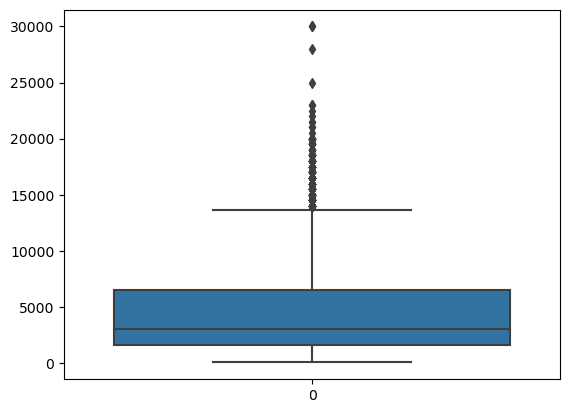

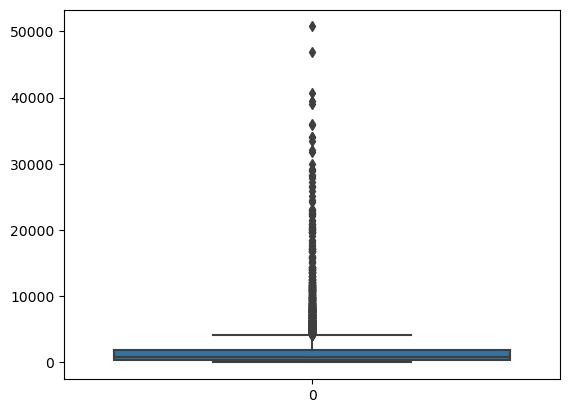

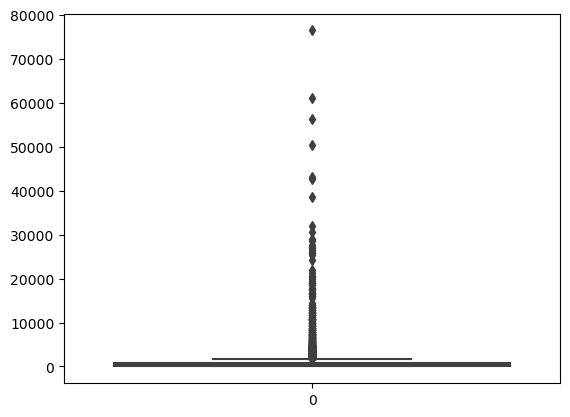

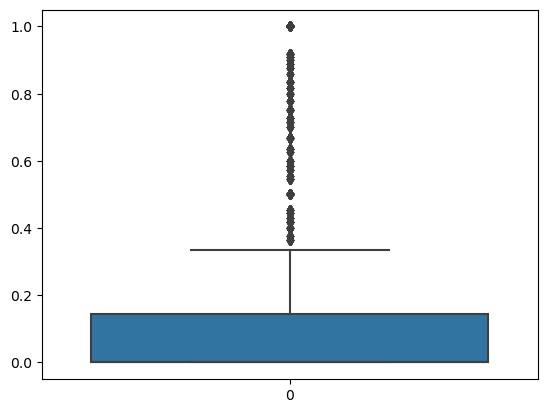

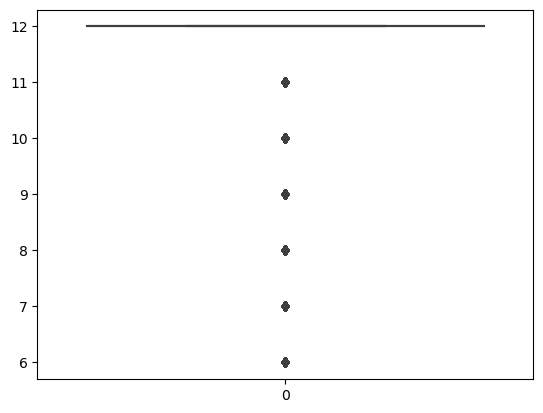

In [9]:
for i in df.select_dtypes(np.number).columns:
    sns.boxplot(df[i])
    plt.show()

In [10]:
#checking missing values, if any:
df.isnull().sum()/len(df)*100

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

In [11]:
#Treating the missing values with their median values as there are outliers present:
df['MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())

In [12]:
df['CREDIT_LIMIT']=df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median())

In [13]:
df.isnull().sum()/len(df)*100

CUST_ID                             0.0
BALANCE                             0.0
BALANCE_FREQUENCY                   0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                    0.0
PURCHASES_TRX                       0.0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    0.0
PRC_FULL_PAYMENT                    0.0
TENURE                              0.0
dtype: float64

In [14]:
#THUS THE MISSING VALUES ARE BEING TREATED.

In [15]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Deriving new KPI

# Monthly average purchase and cash advance amount

In [16]:
df['Monthly_avg_purchase']=df['PURCHASES']/df['TENURE']

In [17]:
print(df['Monthly_avg_purchase'].head())

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: Monthly_avg_purchase, dtype: float64


In [18]:
df['Monthly_cash_advance']=df['CASH_ADVANCE']/df['TENURE']

In [19]:
print(df['Monthly_cash_advance'].head())

0      0.000000
1    536.912124
2      0.000000
3     17.149001
4      0.000000
Name: Monthly_cash_advance, dtype: float64


# Purchases by Type (one-off, installments)

In [20]:
#Finding the type of purchases customers are making credit cards

In [21]:
df[(df['ONEOFF_PURCHASES']==0) & (df['INSTALLMENTS_PURCHASES']==0)].shape

(2042, 20)

In [22]:
df[(df['ONEOFF_PURCHASES']==0) & (df['INSTALLMENTS_PURCHASES']>0)].shape

(2260, 20)

In [23]:
df[(df['ONEOFF_PURCHASES']>0) & (df['INSTALLMENTS_PURCHASES']==0)].shape

(1874, 20)

In [24]:
df[(df['ONEOFF_PURCHASES']>0) & (df['INSTALLMENTS_PURCHASES']>0)].shape

(2774, 20)

In [25]:
#From the above we can say that there are 4 type of cutomer behaviours. So we need to categorize them accordingly.

In [26]:
def purchase(df):
    if (df['ONEOFF_PURCHASES']==0) & (df['INSTALLMENTS_PURCHASES']==0):
        return 'none'
    if (df['ONEOFF_PURCHASES']==0) & (df['INSTALLMENTS_PURCHASES']>0):
        return 'installment'
    if (df['ONEOFF_PURCHASES']>0) & (df['INSTALLMENTS_PURCHASES']==0):
        return 'one_off'
    if (df['ONEOFF_PURCHASES']>0) & (df['INSTALLMENTS_PURCHASES']>0):
        return 'both'

In [27]:
df['purchase_type']=df.apply(purchase,axis=1)

In [28]:
df['purchase_type'].value_counts()

purchase_type
both           2774
installment    2260
none           2042
one_off        1874
Name: count, dtype: int64

# Limit usage (balance to credit limit ratio):

In [29]:
# A lower limit usage implies better credit score.

In [30]:
df['limit_usage']=df.apply(lambda x: x['BALANCE']/x['CREDIT_LIMIT'],axis=1)

In [31]:
df['limit_usage'].head()

0    0.040901
1    0.457495
2    0.332687
3    0.222223
4    0.681429
Name: limit_usage, dtype: float64

# Payments to minimum payments ratio

In [32]:
df['MINIMUM_PAYMENTS'].describe()

count     8950.000000
mean       844.906767
std       2332.792322
min          0.019163
25%        170.857654
50%        312.343947
75%        788.713501
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [33]:
df['pay_min']=df.apply(lambda x: x['PAYMENTS']/x['MINIMUM_PAYMENTS'],axis=1)

In [34]:
df['pay_min'].head()

0    1.446508
1    3.826241
2    0.991682
3    0.000000
4    2.771075
Name: pay_min, dtype: float64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# Outlier Treatment:

In [36]:
#Using log tranformation for treating outliers, so as to regain symmetry.

In [37]:
df_trans=df.drop(['CUST_ID','purchase_type'],axis=1).applymap(lambda x: np.log(x+1))

In [38]:
df_trans.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,pay_min
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,...,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,6.161637,0.619940,4.899647,3.204274,3.352403,3.319086,0.361268,0.158699,0.270072,0.113512,...,1.894731,8.094825,6.624540,5.916079,0.117730,2.519680,3.050877,2.163970,0.296081,1.357600
std,2.013303,0.148590,2.916872,3.246365,3.082973,3.566298,0.277317,0.216672,0.281852,0.156716,...,1.373856,0.819629,1.591763,1.169929,0.211617,0.130367,2.002823,2.429741,0.250303,0.940149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.931826,0.000000,0.018982,0.000000,1.945910,0.000000,0.000000,0.000000,0.000000
25%,4.861995,0.635989,3.704627,0.000000,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,...,0.693147,7.378384,5.951361,5.146667,0.000000,2.564949,1.481458,0.000000,0.040656,0.648817
50%,6.773521,0.693147,5.892417,3.663562,4.499810,0.000000,0.405465,0.080042,0.154151,0.000000,...,2.079442,8.006701,6.754489,5.747301,0.000000,2.564949,3.494587,0.000000,0.264455,1.109459
75%,7.628099,0.693147,7.013133,6.360274,6.151961,7.016449,0.650588,0.262364,0.559616,0.200671,...,2.890372,8.779711,7.550732,6.671670,0.133531,2.564949,4.587295,4.606022,0.540911,1.953415
max,9.854515,0.693147,10.800403,10.615512,10.021315,10.760839,0.693147,0.693147,0.693147,0.916291,...,5.883322,10.308986,10.834125,11.243832,0.693147,2.564949,8.315721,8.276166,2.827902,8.830767


In [39]:
df_trans.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Monthly_avg_purchase', 'Monthly_cash_advance', 'limit_usage',
       'pay_min'],
      dtype='object')

# Insights:

In [40]:
#Mean of payment-min_payment ratio for each type of purchase:
x=df.groupby('purchase_type').apply(lambda x: np.mean(x['pay_min']))

In [41]:
x.values

array([ 7.23698216, 13.2590037 , 10.08745106,  5.57108156])

In [42]:
len(x)

4

Text(0.5, 1.0, 'Mean payment-min_payment ratio for each type of purchase')

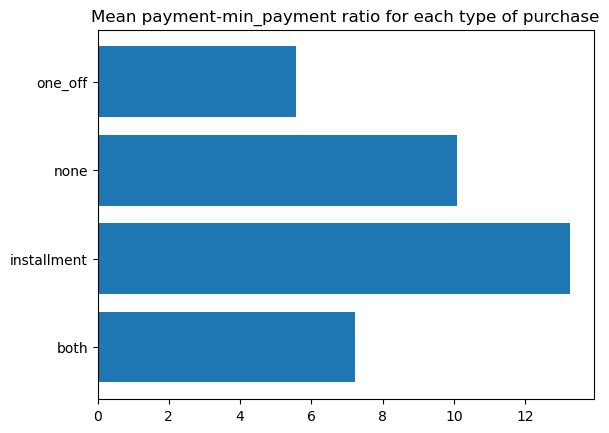

In [43]:
fig,ax=plt.subplots()
ax.barh(y=range(len(x)), width=x.values,align='center')
ax.set(yticks= np.arange(len(x)),yticklabels = x.index);
plt.title('Mean payment-min_payment ratio for each type of purchase')

In [44]:
#Mean payment-min_payment ratio for installment purchase are highest. So the possibility that such people with such purchases are paying dues.

Text(0.5, 1.0, 'Average cash advance taken by customers of different Purchase type :')

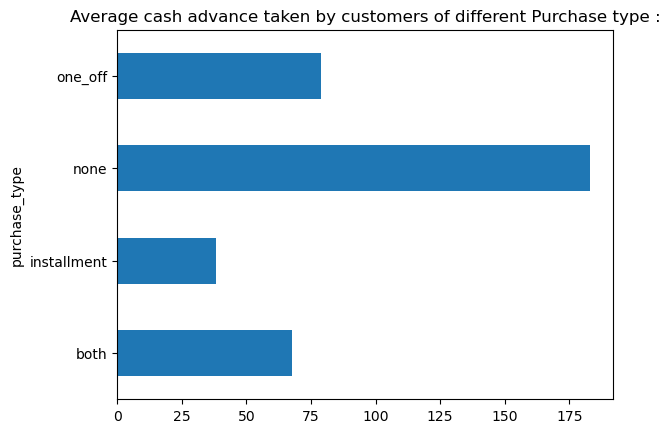

In [45]:
df.groupby('purchase_type').apply(lambda x: np.mean(x['Monthly_cash_advance'])).plot.barh()

plt.title('Average cash advance taken by customers of different Purchase type :')

In [46]:
#People who niether did one_off nor installment type purchase are tend to take highest cash advancve.

<Axes: ylabel='purchase_type'>

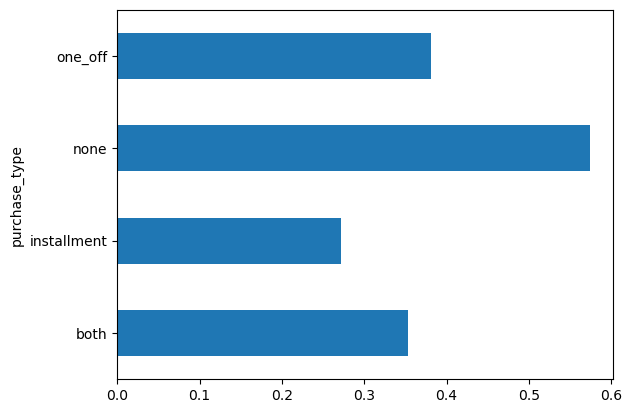

In [47]:
df.groupby('purchase_type').apply(lambda x: np.mean(x['limit_usage'])).plot.barh()

In [48]:
#People who niether did one_off nor installment type purchase have worst credit score while installment type purchases have best credit score.

# Encoding:

In [49]:
df_cat=pd.get_dummies(df['purchase_type'],drop_first=True)

In [50]:
df_dummy=pd.concat([df_trans,df_cat],axis=1)

In [51]:
df_dummy.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,pay_min,installment,none,one_off
0,3.735304,0.597837,4.568506,0.000000,4.568506,0.000000,0.154151,0.000000,0.080042,0.000000,...,4.945277,0.000000,2.564949,2.191654,0.000000,0.040086,0.894662,True,False,False
1,8.071989,0.646627,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,...,6.978531,0.200671,2.564949,0.000000,6.287695,0.376719,1.574068,False,True,False
2,7.822504,0.693147,6.651791,6.651791,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,...,6.442994,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979,False,False,True
3,7.419183,0.492477,7.313220,7.313220,0.000000,5.331694,0.080042,0.080042,0.000000,0.080042,...,5.747301,0.000000,2.564949,4.835620,2.898616,0.200671,0.000000,False,False,True
4,6.707735,0.693147,2.833213,2.833213,0.000000,0.000000,0.080042,0.080042,0.000000,0.000000,...,5.504483,0.000000,2.564949,0.847298,0.000000,0.519644,1.327360,False,False,True


In [52]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   float64
 11  PURCHASES_TRX                     8950 non-null   float64
 12  CREDIT

<Axes: >

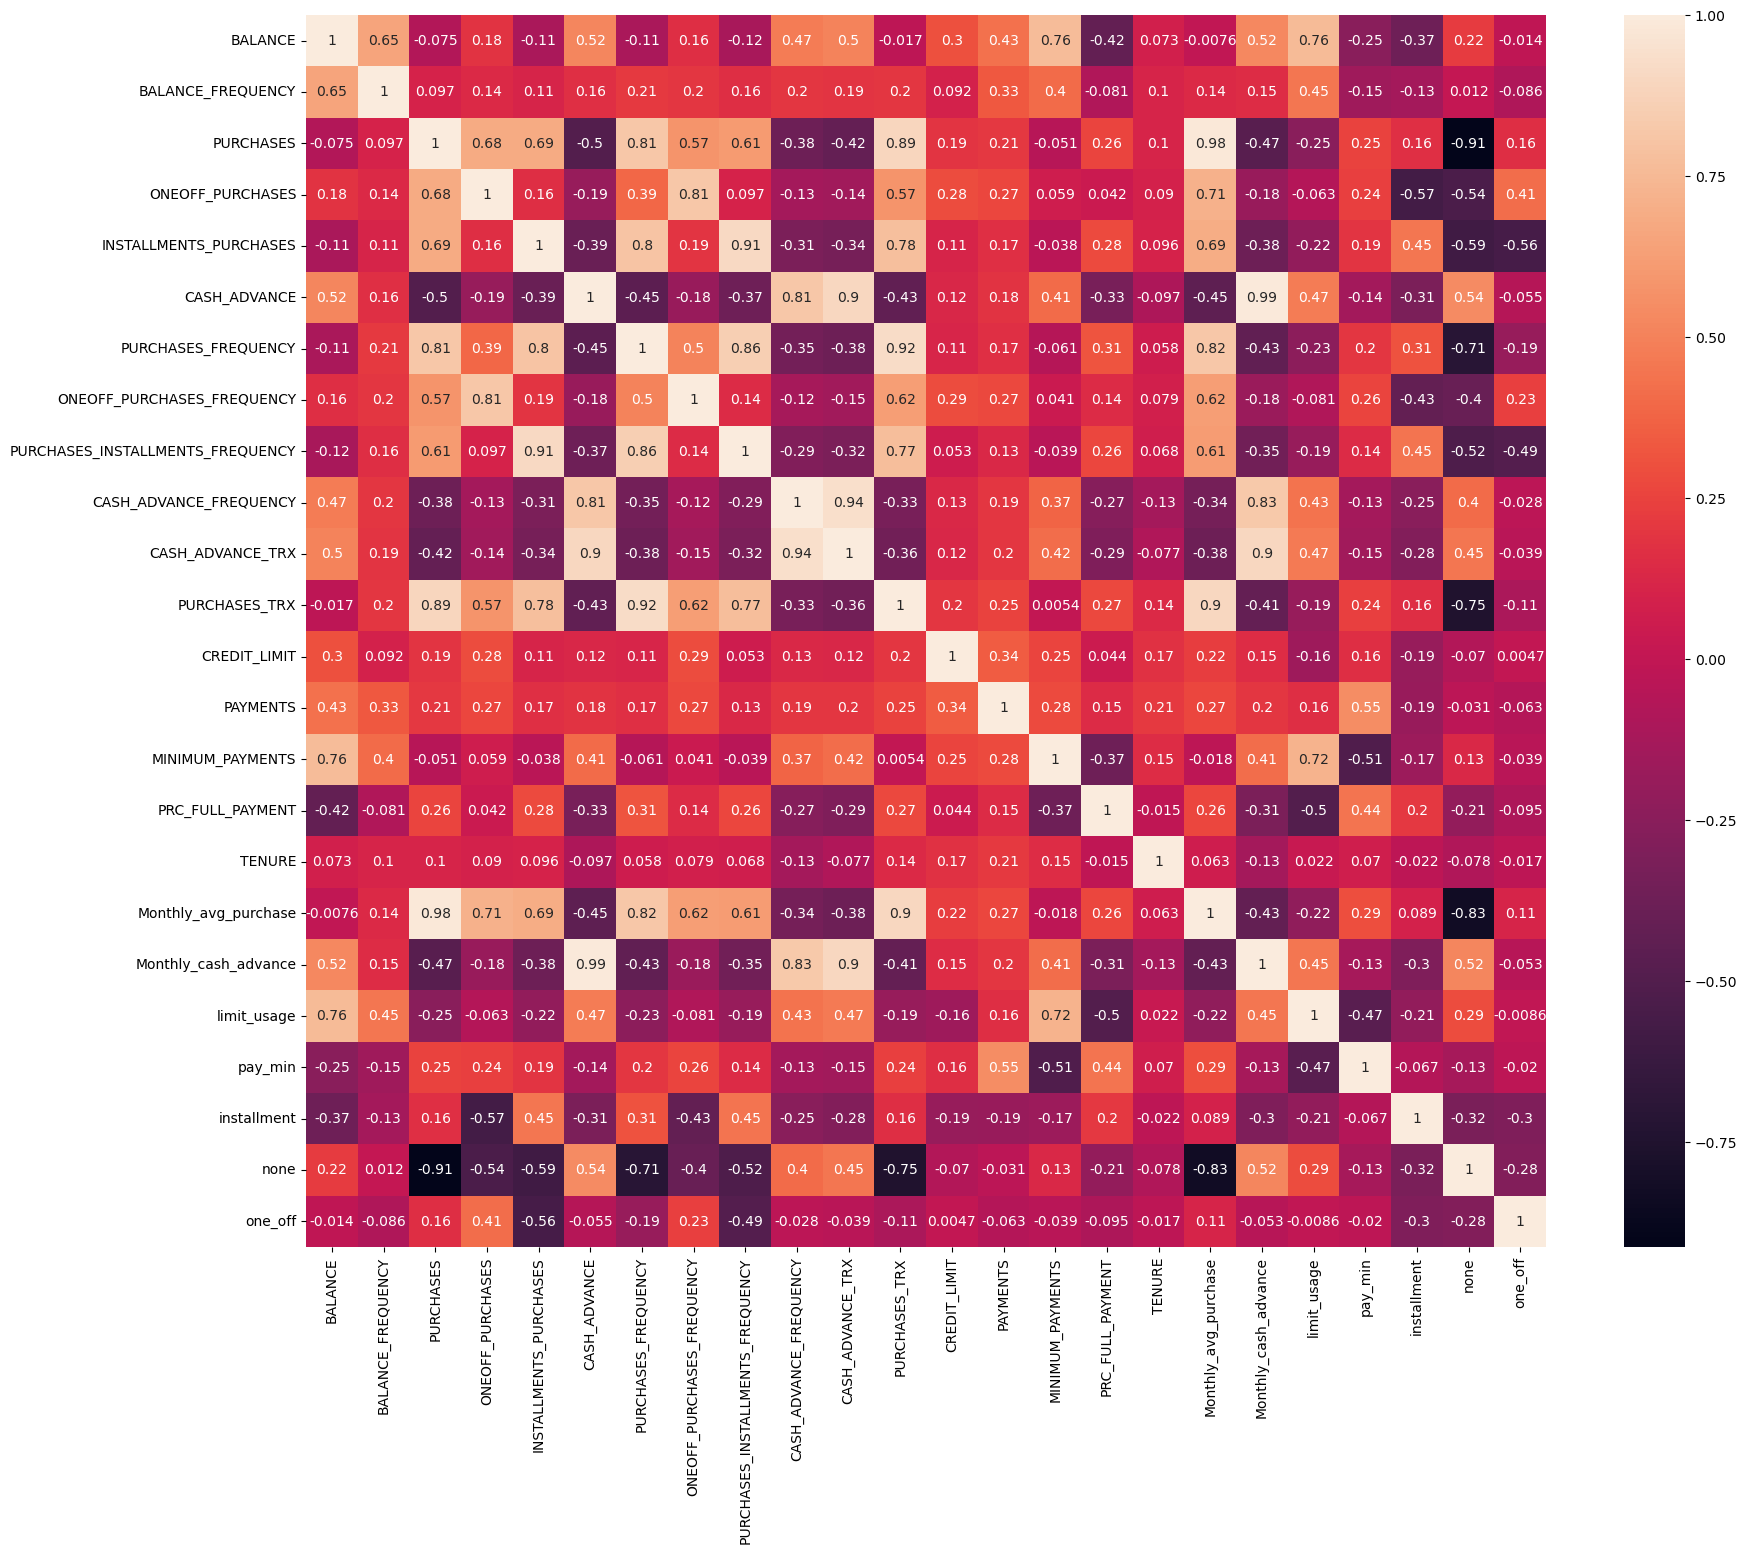

In [53]:
plt.figure(figsize=(20,16))
sns.heatmap(df_dummy.corr(),annot=True)

The above Heatmap shows a high multicollinearity present among many features

# Scaling:

In [54]:
#using standard scaler
from sklearn.preprocessing import StandardScaler

In [55]:
st=StandardScaler()

In [56]:
df_scaled=st.fit_transform(df_dummy)

In [57]:
df_scaled.shape

(8950, 24)

# Model Building: KMeans

In [58]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [59]:
# create several cluster combinations ranging from 1 to 7 and observe the wcss (Within Cluster Sum of Squares) for each cluster
# consider an empty list to store the WCSS
wcss  = []
for i in range(1,8):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)    # the 'inertia_' retuns the WCSS for specific value of K

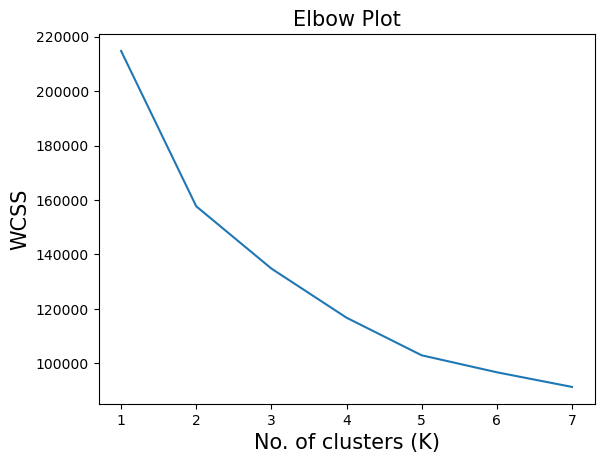

In [60]:
# visualize the elbow plot to get the optimal value of K
plt.plot(range(1,8), wcss)
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)
plt.show()

It seems like the elbow is around 2 or 3 . We will use silhouette score to see which one performs better.

In [61]:
# create a list for different values of K
n_clusters = [2, 3, 4, 5, 6, 7]
for K in n_clusters :
    cluster = KMeans (n_clusters = K, random_state = 10)
    predict = cluster.fit_predict(df_scaled)
    
    # 'silhouette_score' function computes the silhouette score for each K
    score = silhouette_score(df_scaled, predict, random_state= 10)
    print ("For n_clusters = {}, silhouette score is {})".format(K, score))

For n_clusters = 2, silhouette score is 0.2684420180181864)
For n_clusters = 3, silhouette score is 0.22628923654337793)
For n_clusters = 4, silhouette score is 0.2551854679994778)
For n_clusters = 5, silhouette score is 0.25941146604735227)
For n_clusters = 6, silhouette score is 0.25548607801884304)
For n_clusters = 7, silhouette score is 0.252243441125135)


Silhouette score for 2 clusters in maximum. So taking k value as 2

In [62]:
# build a K-Means model for K = 2
# pass the 'random_state' to obtain the same centroid initialization for each code run
K_model = KMeans(n_clusters= 2, random_state= 10)
K_model.fit(df_scaled)

KMeans(n_clusters=2, random_state=10)

In [63]:
# add a column 'Kmeans_label' to the original dataframe
# the 'labels_' returns the cluster number for each observation
df['Kmeans_label'] = K_model.labels_

df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,purchase_type,limit_usage,pay_min,Kmeans_label
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,201.802084,139.509787,0.000000,12,7.950000,0.000000,installment,0.040901,1.446508,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,none,0.457495,3.826241,1
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,622.066742,627.284787,0.000000,12,64.430833,0.000000,one_off,0.332687,0.991682,0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,0.000000,312.343947,0.000000,12,124.916667,17.149001,one_off,0.222223,0.000000,0
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,678.334763,244.791237,0.000000,12,1.333333,0.000000,one_off,0.681429,2.771075,0


In [64]:
np.unique(K_model.labels_, return_counts=True)

(array([0, 1]), array([6074, 2876], dtype=int64))

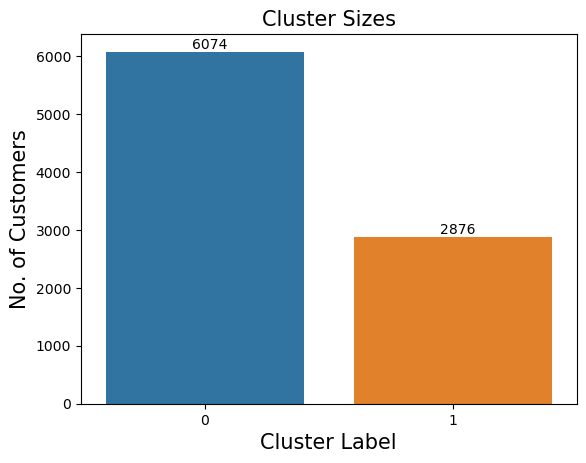

In [65]:

sns.countplot(data= df, x = 'Kmeans_label')

plt.title('Cluster Sizes', fontsize = 15)
plt.xlabel('Cluster Label', fontsize = 15)
plt.ylabel('No. of Customers', fontsize = 15)


plt.text(x = -0.05, y = np.unique(K_model.labels_, return_counts=True)[1][0] + 50, 
         s = np.unique(K_model.labels_, return_counts=True)[1][0])

plt.text(x = 0.95, y = np.unique(K_model.labels_, return_counts=True)[1][1] + 50, 
         s = np.unique(K_model.labels_, return_counts=True)[1][1])




plt.show()

Compute the statistical summary of the observations in the 1st cluster.

In [66]:
df[df.Kmeans_label == 0].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,pay_min,Kmeans_label
count,6074.000000,6074.000000,6074.000000,6074.000000,6074.000000,6074.000000,6074.000000,6074.000000,6074.000000,6074.000000,...,6074.000000,6074.000000,6074.000000,6074.000000,6074.000000,6074.000000,6074.000000,6074.000000,6074.000000,6074.0
mean,1160.880178,0.865713,1428.057626,831.359032,597.120879,383.562759,0.688124,0.276814,0.524525,0.056190,...,4560.554317,1705.936701,727.957648,0.208493,11.608660,122.389279,34.033472,0.294336,9.527843,0.0
std,1829.026817,0.247337,2459.666535,1942.254122,1045.429733,1346.047317,0.321757,0.328850,0.384237,0.132322,...,3728.638240,2896.333671,2237.412010,0.330937,1.219037,207.469012,121.188956,0.336780,131.392117,0.0
min,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,...,150.000000,0.000000,0.019163,0.000000,6.000000,0.000833,0.000000,0.000000,0.000000,0.0
25%,65.569196,0.818182,294.032500,0.000000,55.562500,0.000000,0.416667,0.000000,0.090909,0.000000,...,1600.000000,373.848099,155.714597,0.000000,12.000000,25.838542,0.000000,0.020609,1.055762,0.0
50%,424.953439,1.000000,699.060000,215.000000,291.060000,0.000000,0.833333,0.133929,0.555556,0.000000,...,3200.000000,858.395102,218.155939,0.000000,12.000000,61.223750,0.000000,0.128030,2.759470,0.0
75%,1452.407574,1.000000,1649.632500,959.025000,720.675000,0.000000,1.000000,0.500000,0.916667,0.000000,...,6500.000000,1905.868612,613.896369,0.333333,12.000000,142.043333,0.000000,0.501362,7.110965,0.0
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,29282.109150,1.000000,1.000000,1.000000,1.000000,...,30000.000000,50721.483360,76406.207520,1.000000,12.000000,4086.630833,2693.865496,2.033580,6840.528861,0.0


There are 2880 customers in this cluster, which makes this the smallest cluster.

In [67]:
df[df.Kmeans_label == 1].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,pay_min,Kmeans_label
count,2876.000000,2876.000000,2876.000000,2876.000000,2876.000000,2876.000000,2876.000000,2876.000000,2876.000000,2876.000000,...,2876.000000,2876.000000,2876.000000,2876.000000,2876.000000,2876.000000,2876.000000,2876.000000,2876.000000,2876.0
mean,2416.851011,0.901681,105.932281,87.844127,18.130459,2236.139173,0.072661,0.045419,0.026338,0.301893,...,4354.318919,1790.604295,1091.898750,0.038025,11.324409,9.692390,205.018653,0.588564,8.069333,1.0
std,2312.824687,0.211170,493.726199,482.042757,97.096151,2744.575847,0.160006,0.110719,0.106481,0.216076,...,3437.296467,2892.042059,2504.931006,0.123441,1.543156,43.327740,255.414784,0.417622,83.696523,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,50.000000,0.000000,0.117036,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,882.970964,0.909091,0.000000,0.000000,0.000000,461.986748,0.000000,0.000000,0.000000,0.142857,...,1600.000000,397.714727,300.795760,0.000000,12.000000,0.000000,40.086049,0.349595,0.737233,1.0
50%,1634.430070,1.000000,0.000000,0.000000,0.000000,1391.867362,0.000000,0.000000,0.000000,0.250000,...,3000.000000,854.753864,531.299281,0.000000,12.000000,0.000000,124.711297,0.623885,1.095114,1.0
75%,3239.043183,1.000000,51.765000,0.000000,0.000000,2967.332112,0.083333,0.000000,0.000000,0.416667,...,6000.000000,1895.358410,1148.129087,0.000000,12.000000,4.583333,271.037792,0.865103,3.627388,1.0
max,16304.889250,1.000000,22101.780000,22101.780000,1770.570000,47137.211760,1.000000,1.000000,1.000000,1.500000,...,19600.000000,39461.965800,61031.618600,1.000000,12.000000,1841.815000,3928.100980,15.909951,2846.533661,1.0


There are 6070 customers in this cluster, which makes this the largest cluster.

# DBSCAN:

In [68]:
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import euclidean_distances


In [69]:
dist_array = euclidean_distances(df_scaled)[np.triu_indices(8950, k = 1)]

# calculate the minimum euclidean distance between the data points 
print('Minimum Distance:', dist_array.min())

# calculate the maximum euclidean distance between the data points 
print('Maximum Distance:', dist_array.max())

Minimum Distance: 0.0402270928044282
Maximum Distance: 17.828713376256697


The above output shows that the minimum distance between two distinct data points is 0.0402 and the maximum distance is 17.82.

In [70]:
df_scaled.ndim

2

In [71]:
dbscan_model = DBSCAN(eps = 1.4, min_samples = 4)

# fit the model on the scaled data
dbscan_model.fit(df_scaled)

DBSCAN(eps=1.4, min_samples=4)

In [72]:
# display the labels of unique clusters formed by DBSCAN
(set(dbscan_model.labels_))

{-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34}

In [73]:
df['DBSCSAN_label'] = dbscan_model.labels_

df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,purchase_type,limit_usage,pay_min,Kmeans_label,DBSCSAN_label
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,139.509787,0.000000,12,7.950000,0.000000,installment,0.040901,1.446508,0,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,1072.340217,0.222222,12,0.000000,536.912124,none,0.457495,3.826241,1,1
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,627.284787,0.000000,12,64.430833,0.000000,one_off,0.332687,0.991682,0,2
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,312.343947,0.000000,12,124.916667,17.149001,one_off,0.222223,0.000000,0,-1
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,244.791237,0.000000,12,1.333333,0.000000,one_off,0.681429,2.771075,0,2


In [74]:
# use the 'value_counts()' to get the number of customers in each cluster
df['DBSCSAN_label'].value_counts()

DBSCSAN_label
-1     2018
 3     1988
 0     1743
 1     1717
 2     1240
 6       45
 16      33
 11      22
 12      13
 22      10
 18       9
 24       8
 8        8
 19       7
 4        7
 7        6
 14       6
 21       5
 28       5
 25       5
 30       4
 32       4
 33       4
 5        4
 23       4
 15       4
 10       4
 9        4
 13       3
 17       3
 34       3
 26       3
 29       3
 27       3
 31       3
 20       2
Name: count, dtype: int64

The largest cluster contains 1988 observations and the smallest cluster is the one containing 2 observations. 2018 customers are identified as outliers/ noise in the data.


# Hierarchical Clustering

In [75]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram


In [76]:
# instantiate linkage object with scaled data and consider 'ward' linkage method 
link_mat = linkage(df_scaled, method = 'ward')     

print(link_mat[0:10])

[[6.04400000e+03 7.25700000e+03 4.02270928e-02 2.00000000e+00]
 [5.32300000e+03 7.95800000e+03 6.74702726e-02 2.00000000e+00]
 [4.36200000e+03 6.35900000e+03 8.29501806e-02 2.00000000e+00]
 [2.17800000e+03 8.09200000e+03 8.85278288e-02 2.00000000e+00]
 [5.21900000e+03 8.44200000e+03 8.99784581e-02 2.00000000e+00]
 [1.92800000e+03 8.50100000e+03 1.01214052e-01 2.00000000e+00]
 [2.13900000e+03 4.38400000e+03 1.03416553e-01 2.00000000e+00]
 [3.73100000e+03 7.39300000e+03 1.08595067e-01 2.00000000e+00]
 [1.81000000e+02 4.40100000e+03 1.11853312e-01 2.00000000e+00]
 [2.04200000e+03 4.24400000e+03 1.12296549e-01 2.00000000e+00]]


The above matrix represents the distance at which the smaller clusters merge to form the larger cluster.


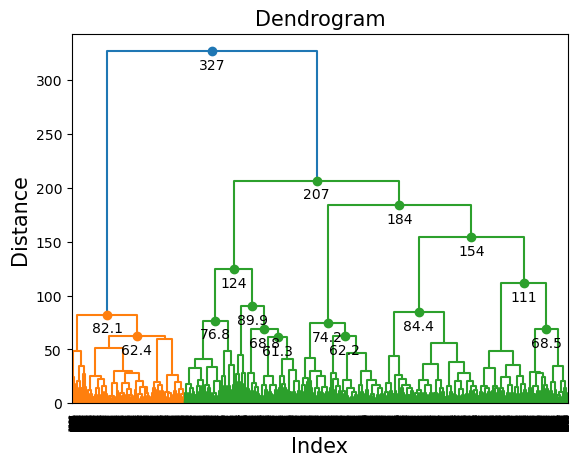

In [77]:
# plot the dendrogram
# pass the linkage matrix
dendro = dendrogram(link_mat)


for i, d, c in zip(dendro['icoord'], dendro['dcoord'], dendro['color_list']):
    
    
    x = sum(i[1:3])/2
    
    
    y = d[1]
    
    
    if y > 60:
        
        
        plt.plot(x, y, 'o', c=c)
        
        
        plt.annotate("%.3g" % y, (x, y), xytext=(0, -5), textcoords='offset points', va='top', ha='center')

plt.title('Dendrogram', fontsize = 15)
plt.xlabel('Index', fontsize = 15)
plt.ylabel('Distance', fontsize = 15)


plt.show()

The above dendrogram shows that the number of clusters (=2) is constant from the distance 207 to 327. Thus, the dendrogram returns the value 'two' as the optimal number of clusters.

But the two clusters will only provide the group of customers with 'high' or 'low' credit card usage.For further insights we need to group the data into more than 2 clusters.

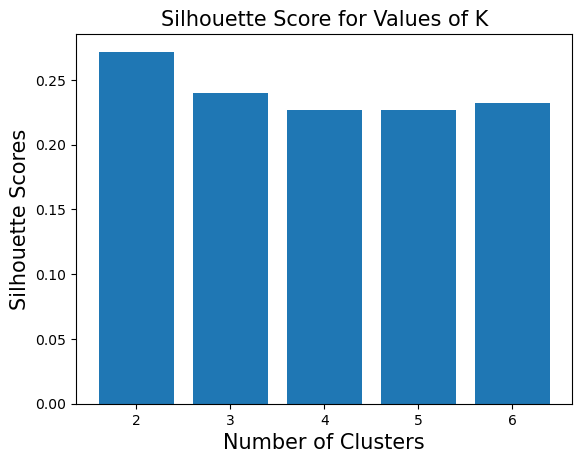

In [78]:
from sklearn.cluster import AgglomerativeClustering
K = [2, 3, 4, 5, 6]
silhouette_scores = [] 

for i in K:
    hierar_model = AgglomerativeClustering(n_clusters = i, linkage = 'ward') 
    silhouette_scores.append(silhouette_score(df_scaled, hierar_model.fit_predict(df_scaled))) 
    
# plot the silhouette score for different K
plt.bar(K, silhouette_scores) 


plt.title('Silhouette Score for Values of K', fontsize = 15)
plt.xlabel('Number of Clusters', fontsize = 15) 
plt.ylabel('Silhouette Scores', fontsize = 15)

# display the plot
plt.show()

The above bar plot shows that the silhouette score for K = 2 is the highest.So continuing with that only. 

# Model Building:

In [79]:
# instantiate clustering method with 2 clusters and 'ward' linkage method
hierar_clusters = AgglomerativeClustering(n_clusters = 2, linkage = 'ward')

hierar_clusters.fit(df_scaled)

AgglomerativeClustering()

In [80]:
df['Hierar_label'] = hierar_clusters.labels_


df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,purchase_type,limit_usage,pay_min,Kmeans_label,DBSCSAN_label,Hierar_label
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,0.000000,12,7.950000,0.000000,installment,0.040901,1.446508,0,0,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,0.222222,12,0.000000,536.912124,none,0.457495,3.826241,1,1,1
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,0.000000,12,64.430833,0.000000,one_off,0.332687,0.991682,0,2,0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,0.000000,12,124.916667,17.149001,one_off,0.222223,0.000000,0,-1,0
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,0.000000,12,1.333333,0.000000,one_off,0.681429,2.771075,0,2,0


In [81]:
df['Hierar_label'].value_counts()

Hierar_label
0    6908
1    2042
Name: count, dtype: int64

The largest cluster contains 6908 observations and the smallest cluster is the one containing 2042 observations.

# Dimensionality Reduction:

In [83]:
from sklearn.decomposition import PCA

In [84]:
# consider 'n_components=2' to get the two principal components 
# pass the 'random_state' to get the same output for multiple runs
pca_2 = PCA(n_components = 2, random_state = 10)
components = pca_2.fit_transform(df_scaled)


df_pca = pd.DataFrame(data = components, columns = ['PC1', 'PC2'])
df_pca.head()

,PC1,PC2
0,-0.536381,-3.212505
1,4.494291,0.481861
2,-1.533488,1.553187
3,0.828078,-0.631559
4,1.067379,-1.283647


The above dataframe contains 2 principal components obtained from the original data. Here we have reduced the number of variables from 11 to 2.

# Visualize the clusters formed using various clustering algorithms.

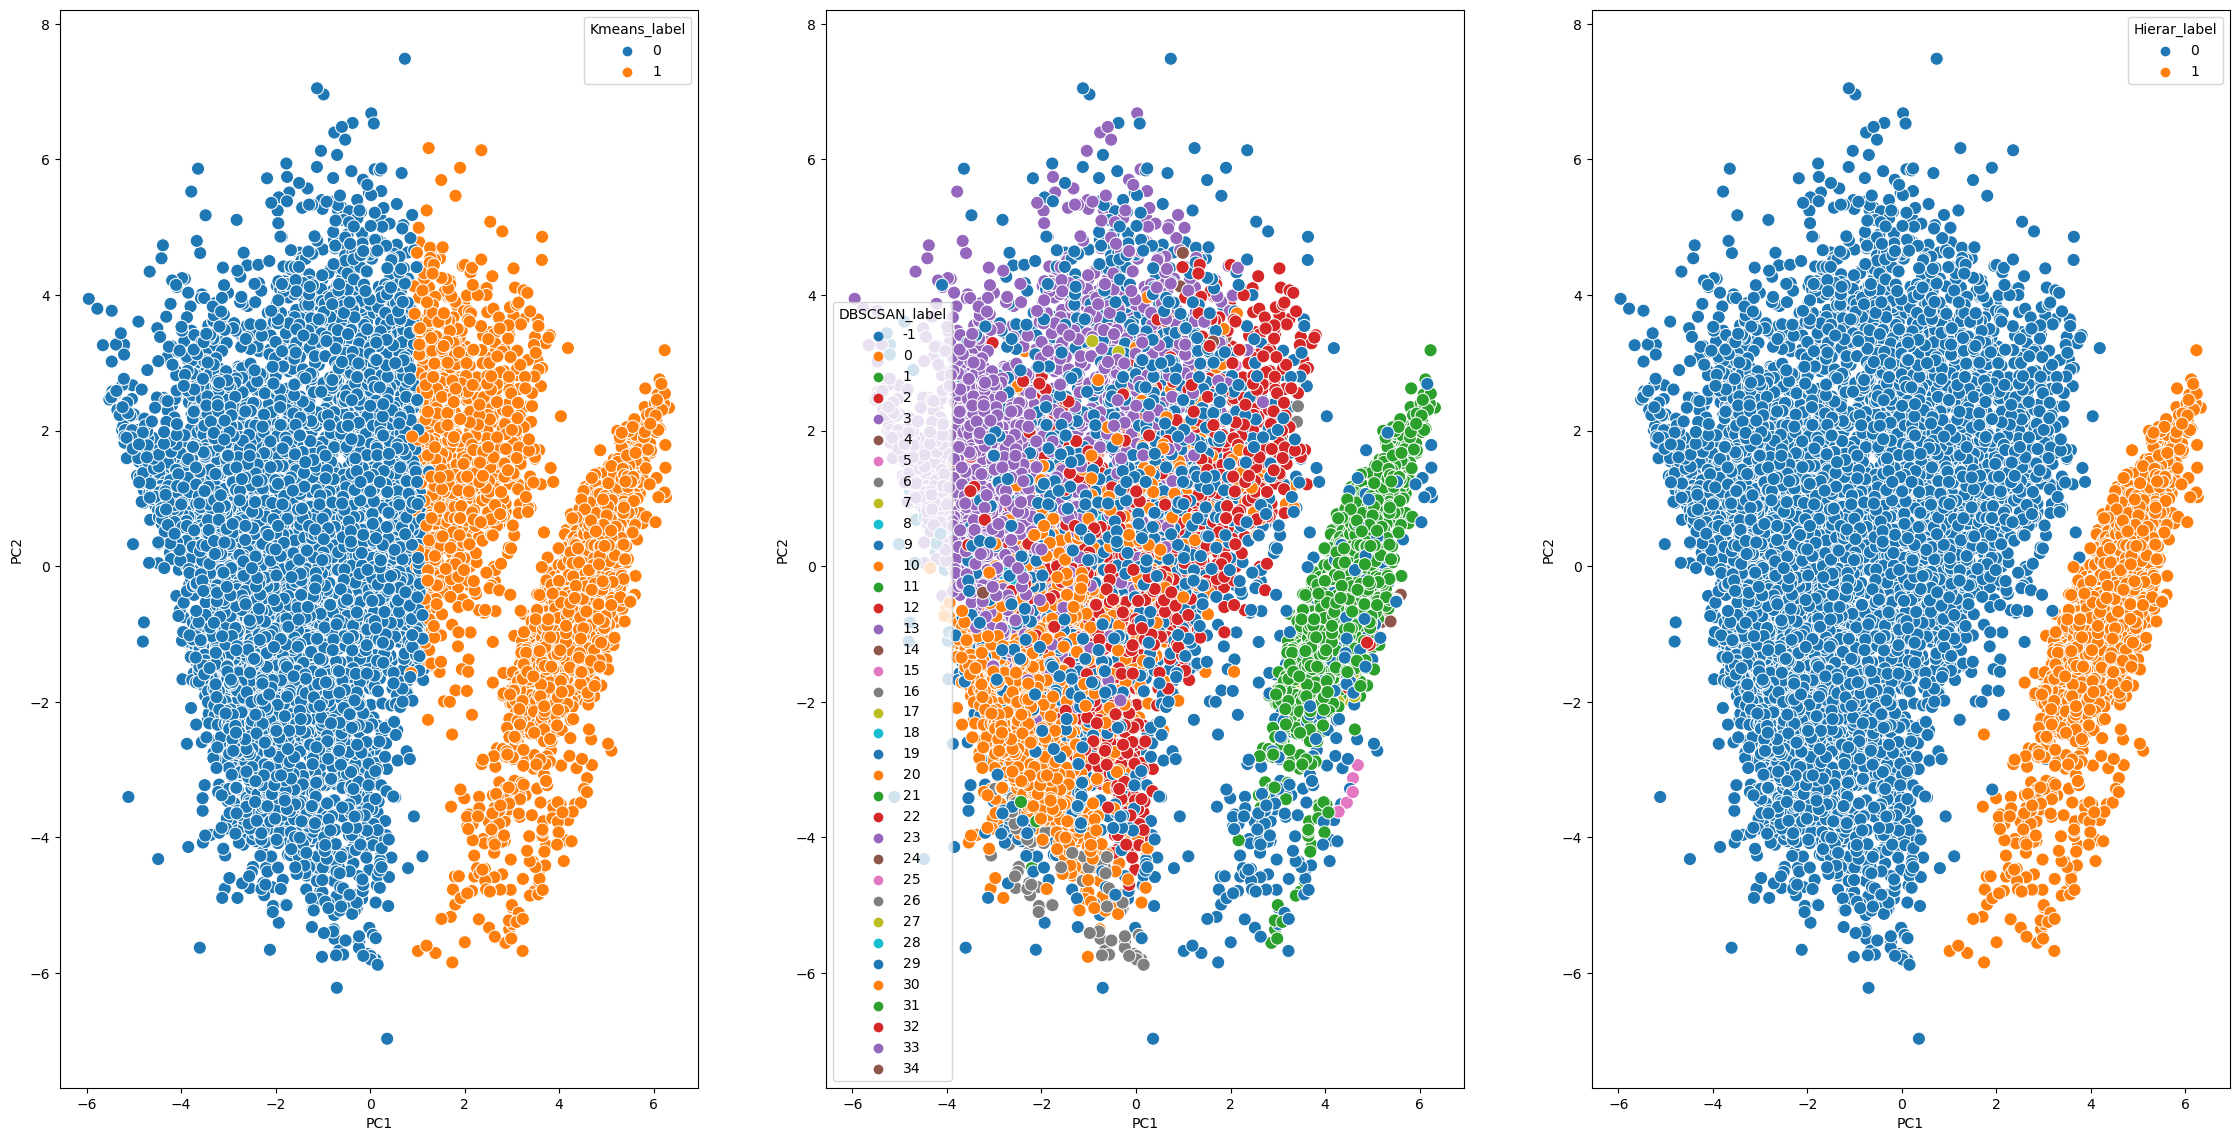

In [85]:
# set the plot size
plt.figure(figsize = (28, 14))
plt.subplot(1,3,1)
sns.scatterplot(x = 'PC1', y = 'PC2', data = df_pca,  s = 90, hue = df['Kmeans_label'], palette = 'tab10')
plt.subplot(1,3,2)
sns.scatterplot(x = 'PC1', y = 'PC2', data = df_pca,  s = 90, hue = df['DBSCSAN_label'], palette = 'tab10')
plt.subplot(1,3,3)
sns.scatterplot(x = 'PC1', y = 'PC2', data = df_pca,  s = 90, hue = df['Hierar_label'], palette = 'tab10')

# display the plot
plt.show()

The subplots above represent clusters formed by different algorithms. We can see that the K-means and hierarchical clustering have created 2 clusters, while the DBSCAN algorithm has grouped the data into >10 clusters.

The plots for K-means and hierarchical clustering show similarity in cluster formation. The DBSCAN algorithm has clustered Customers based on the Card usage & other factors. Also, the blue points in the DBSCAN plot represent the outliers identified by the algorithm.

We can see that some points overlap in the subplots, this is because we have projected a 11-D dataset to 2-D.

Thus by KMeans as well as  Hierarchical clustering we have segmentated the customers into two groups based on lower as well as higher credit card usage.
